In [20]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import scipy.integrate
import scipy.signal
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc ## desnecessário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,8))

#Discretização
M = 101 #espaço
N = 10000 #tempo
Tmax = 1000.0

In [3]:
t = np.linspace(0,Tmax,N)
x = np.sin(t*2*np.pi) + np.sin(3*t*2*np.pi)

In [93]:
#"""Normaliza uma série no espaço de Fourier""", a partir do máximo e da mediana
#Só usar para espectros com picos bem definidos e para as séreis já nos valores absolutos
def normalize_ft(X):
    return (X/(np.max(X) - np.median(X)))

#Determina a cor dos pontos a serem plotados, depois de normalizados

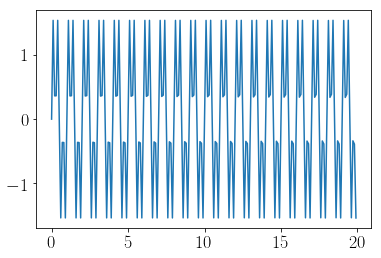

In [4]:
plt.plot(t[:200],x[:200])

4918.14185394
1.79017828162


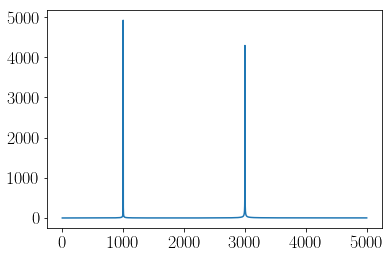

In [35]:
xf = np.fft.rfft(x)
plt.plot(np.abs(xf))

print(np.max(np.abs(xf)))
print(np.median(np.abs(xf))) #Método naive: comparar as diferenças entre esses dois valores para definir o pico

#O problema é que precisa ter essa estrutura de picos isolados para fazer sentido

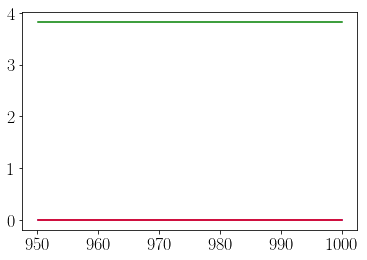

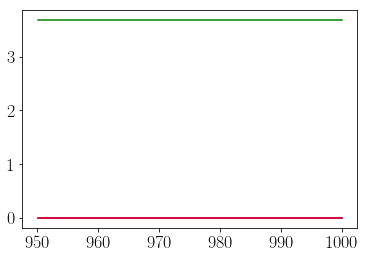

In [118]:
#Direto do arquivo
#plt.figure(figsize=(10,8))
l = 0.5 + 0*0.0125

mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,1.0]]
D1,D2,DR = D[0]
t = np.linspace(0,Tmax,N)

#Var

sol = np.load('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
        % (l,DR,D1,D2,mu,gamma,beta))

B1B2 = sol[:,0]
A1 = sol[:,1]
A2 = sol[:,2]
plt.plot(t[-500:],B1B2[-500:], color = 'green')
plt.plot(t[-500:],A1[-500:], color = 'blue')
plt.plot(t[-500:],A2[-500:], color = 'red')
plt.show()


#NumInt

sol = np.load('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
        % (l,DR,D1,D2,mu,gamma,beta))

R = np.transpose(sol[:,0:M])
C1 = np.transpose(sol[:,M:2*M])
C2 = np.transpose(sol[:,2*M:])
plt.plot(t[-500:],R[M/2,-500:],color = 'green')
plt.plot(t[-500:],C1[M/2,-500:],color = 'blue')
plt.plot(t[-500:],C2[M/2,-500:],color = 'red')
R = R[M/2,:]
C1 = C1[M/2,:]
C2 = C2[M/2,:]

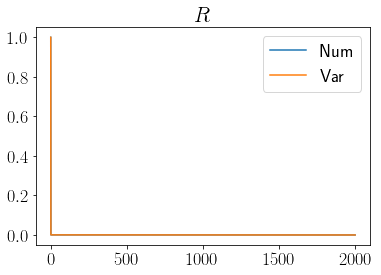

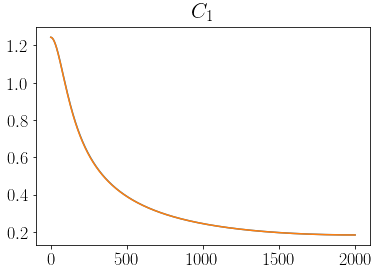

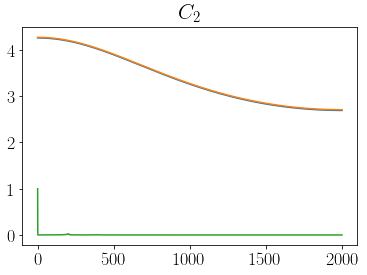

In [119]:
#TF-Var
B1B2f = np.fft.rfft(B1B2)
A1f = np.fft.rfft(A1)
A2f = np.fft.rfft(A2)
#plt.plot(np.abs(B1B2f[0:700]))

#TF-Numerico
Rf = np.fft.rfft(R)
C1f = np.fft.rfft(C1)
C2f = np.fft.rfft(C2)
#plt.plot(np.abs(C1f[0:700]))

plt.show()

#""""""""""Normalizando""""""""""

#Recurso
referencia = np.max(np.abs(Rf)) - np.median(np.abs(Rf))
newRf = np.abs(Rf)/referencia 

plt.plot(np.abs(newRf),label='Num')

referencia = np.max(np.abs(B1B2f)) - np.median(np.abs(B1B2f))
newB1B2f = np.abs(B1B2f)/referencia 

plt.plot(np.abs(newB1B2f),label='Var')
plt.title(r"$R$")

plt.legend(loc = 'best')
plt.show()

#Presa
plt.plot(normalize_ft(np.abs(C1f)))

plt.plot(normalize_ft(np.abs(A1f)))
plt.title(r"$C_1$")

plt.show()

#Predador

plt.plot(normalize_ft(np.abs(C2f)))

plt.plot(normalize_ft(np.abs(A2f)))

plt.plot(np.abs(newA2f))
plt.title(r"$C_2$")

plt.show()

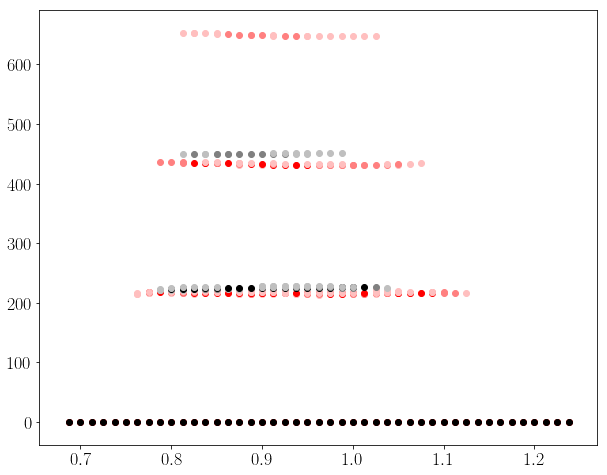

In [149]:
#Fazendo para vários l
plt.figure(figsize=(10,8))
Nl = 60
L = [0.5 + 0.0125*j for j in range(15,Nl)]

mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,1.0]]
D1,D2,DR = D[0]
t = np.linspace(0,Tmax,N)

for l in L:

    #Var
    sol = np.load('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
            % (l,DR,D1,D2,mu,gamma,beta))

    B1B2 = sol[:,0]
    A1 = sol[:,1]
    A2 = sol[:,2] 

    #FT Já pegando o valor absoluto

    B1B2f = np.abs(np.fft.rfft(B1B2))
    A1f = np.abs(np.fft.rfft(A1))
    A2f = np.abs(np.fft.rfft(A2))

    #"normalizar"

    nB1B2f = normalize_ft(B1B2f)
    nA1f = normalize_ft(A1f)
    nA2f = normalize_ft(A2f)


    #NumInt

    sol = np.load('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
            % (l,DR,D1,D2,mu,gamma,beta))

    R = np.transpose(sol[:,0:M])
    C1 = np.transpose(sol[:,M:2*M])
    C2 = np.transpose(sol[:,2*M:])

        #centro do patch
    R = R[M/2,:]
    C1 = C1[M/2,:]
    C2 = C2[M/2,:]

    Rf = np.abs(np.fft.rfft(R))
    C1f = np.abs(np.fft.rfft(C1))
    C2f = np.abs(np.fft.rfft(C2))

    nRf = normalize_ft(Rf)
    nC1f = normalize_ft(C1f)
    nC2f = normalize_ft(C2f)
    
    ''' 
    #recurso
    for i in range(len(nB1B2f[0:1000])):
        if nB1B2f[i] > 0.2:
            plt.scatter(l,i,c = (0.0,0.0,0.0))
            
        elif nB1B2f[i] > 0.1:
            plt.scatter(l,i,c = (0.5,0.5,0.5))
            
        elif nB1B2f[i] > 0.05:
            plt.scatter(l,i,c = (0.75,0.75,0.75))
            
    for i in range(len(nRf[0:1000])):
        if nRf[i] > 0.2:
            plt.scatter(l,i,c = (0.0,1.0,0.0))
            
        elif nRf[i] > 0.1:
            plt.scatter(l,i,c = (0.5,1.0,0.5))
            
        elif nRf[i] > 0.05:
            plt.scatter(l,i,c = (0.75,1.0,0.75))
            
    '''
    '''
    #presa
    for i in range(len(nA1f[0:1000])):
        if nA1f[i] > 0.2:
            plt.scatter(l,i,c = (0.0,0.0,1.0))
            
        elif nA1f[i] > 0.1:
            plt.scatter(l,i,c = (0.5,0.5,1.0))
            
        elif nA1f[i] > 0.05:
            plt.scatter(l,i,c = (0.75,0.75,1.0))
            
    for i in range(len(nC1f[0:1000])):
        if nC1f[i] > 0.2:
            plt.scatter(l,i,c = (0.0,0.0,0.0))
            
        elif nC1f[i] > 0.1:
            plt.scatter(l,i,c = (0.5,0.5,0.5))
            
        elif nC1f[i] > 0.05:
            plt.scatter(l,i,c = (0.75,0.75,0.75))
    '''
    #predador
    for i in range(len(nA2f[0:1000])):
        if nA2f[i] > 0.2:
            plt.scatter(l,i,c = (1.0,0.0,0.0))
            
        elif nA2f[i] > 0.1:
            plt.scatter(l,i,c = (1.0,0.5,0.5))
            
        elif nA2f[i] > 0.05:
            plt.scatter(l,i,c = (1.0,0.75,0.75))
            
    for i in range(len(nC2f[0:1000])):
        if nC2f[i] > 0.2:
            plt.scatter(l,i,c = (0.0,0.0,0.0))
            
        elif nC2f[i] > 0.1:
            plt.scatter(l,i,c = (0.5,0.5,0.5))
            
        elif nC2f[i] > 0.05:
            plt.scatter(l,i,c = (0.75,0.75,0.75))
        

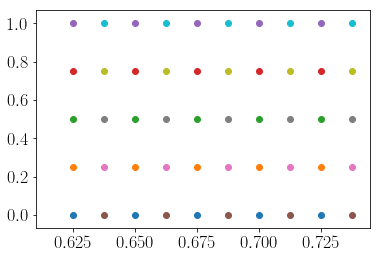

In [88]:
x = [0,0.25,0.5,0.75,1.0]
for l in L:
    for i in range(len(x)):
        plt.scatter(l,x[i])
    